# Visualization with Pandas (and Matplotlib)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
# read in the drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

## Histogram: show the distribution of a numerical variable

In [4]:
# sort the beer column and mentally split it into 3 groups
drinks.beer.sort_values

<bound method Series.sort_values of 0        0
1       89
2       25
3      245
4      217
5      102
6      193
7       21
8      261
9      279
10      21
11     122
12      42
13       0
14     143
15     142
16     295
17     263
18      34
19      23
20     167
21      76
22     173
23     245
24      31
25     231
26      25
27      88
28      37
29     144
      ... 
163    128
164     90
165    152
166    185
167      5
168      2
169     99
170    106
171      1
172     36
173     36
174    197
175     51
176     51
177     19
178      6
179     45
180    206
181     16
182    219
183     36
184    249
185    115
186     25
187     21
188    333
189    111
190      6
191     32
192     64
Name: beer, Length: 193, dtype: int64>

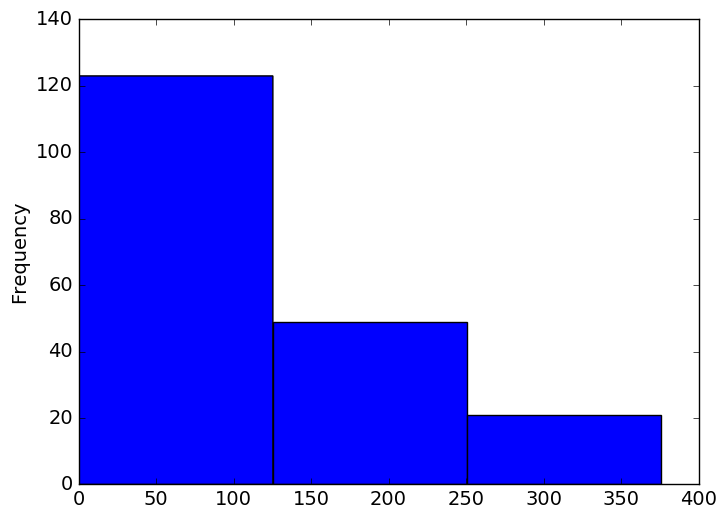

In [4]:
# compare with histogram
drinks.beer.plot(kind='hist', bins=3)

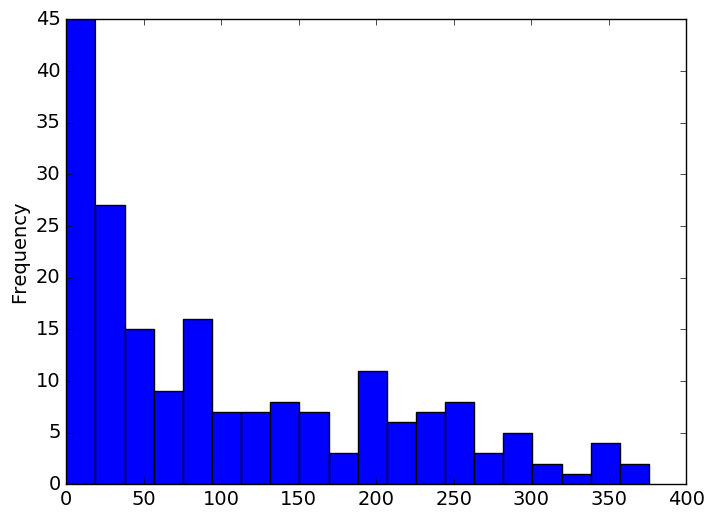

In [5]:
# try more bins
drinks.beer.plot(kind='hist', bins=20)

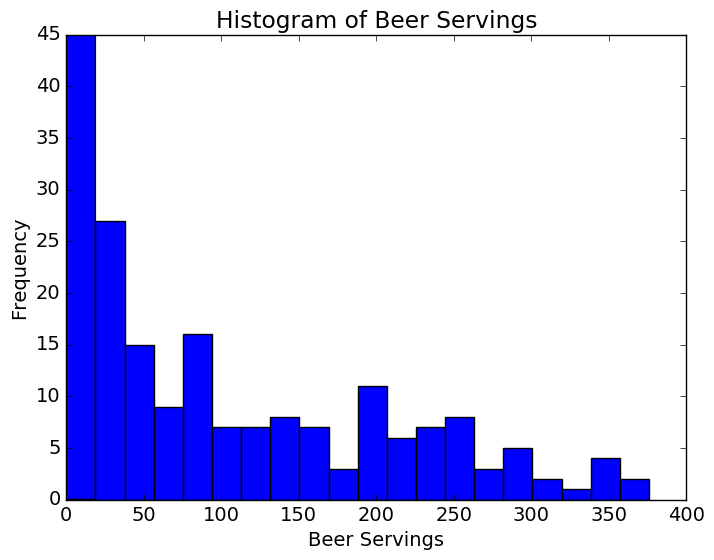

In [6]:
# add title and labels
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')

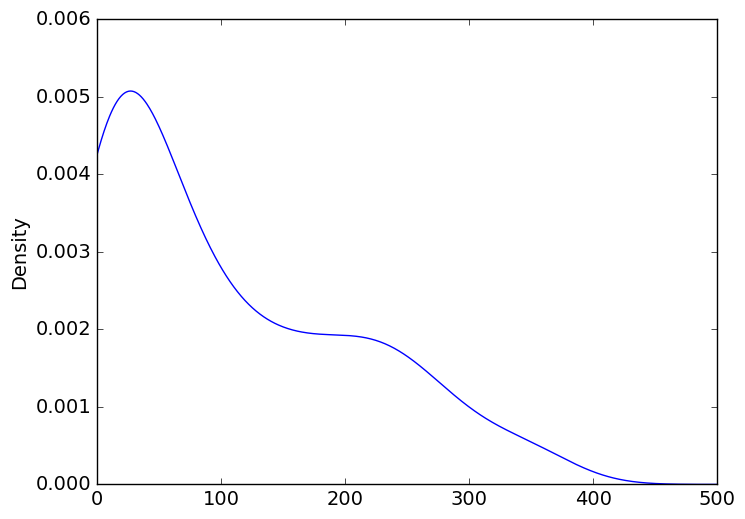

In [7]:
# compare with density plot (smooth version of a histogram)
drinks.beer.plot(kind='density', xlim=(0, 500))

## Scatter Plot: show the relationship between two numerical variables

In [9]:
# select the beer and wine columns and sort by beer
drinks[['beer', 'wine']].sort_values
#if you just want to sort by country (which is the first row) then just put sort_values. If by ('beer') or ('wine') then just input at the end

<bound method DataFrame.sort_values of      beer  wine
0       0     0
1      89    54
2      25    14
3     245   312
4     217    45
5     102    45
6     193   221
7      21    11
8     261   212
9     279   191
10     21     5
11    122    51
12     42     7
13      0     0
14    143    36
15    142    42
16    295   212
17    263     8
18     34    13
19     23     0
20    167     8
21     76     8
22    173    35
23    245    16
24     31     1
25    231    94
26     25     7
27     88     0
28     37     7
29    144    16
..    ...   ...
163   128     7
164    90     2
165   152   186
166   185   280
167     5    16
168     2     0
169    99     1
170   106    86
171     1     4
172    36    19
173    36     5
174   197     7
175    51    20
176    51     7
177    19    32
178     6     9
179    45     0
180   206    45
181    16     5
182   219   195
183    36     1
184   249    84
185   115   220
186    25     8
187    21    11
188   333     3
189   111     1
190     6     0
1

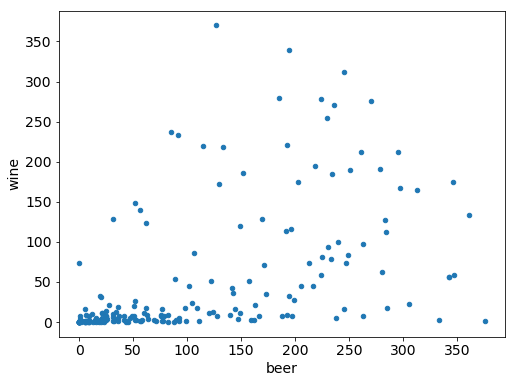

In [10]:
# compare with scatter plot
drinks.plot(kind='scatter', x='beer', y='wine')

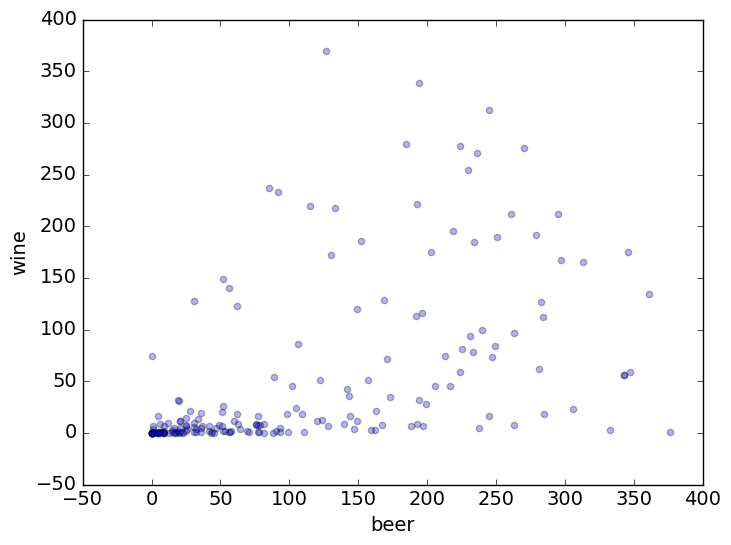

In [10]:
# add transparency
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3)

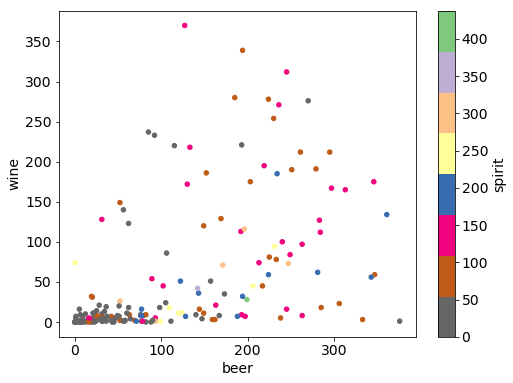

In [14]:
# vary point color by spirit servings
drinks.plot(kind='scatter', x='beer', sharex=False, y='wine', c='spirit', colormap='Accent_r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C236A20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C8D3358>]], dtype=object)

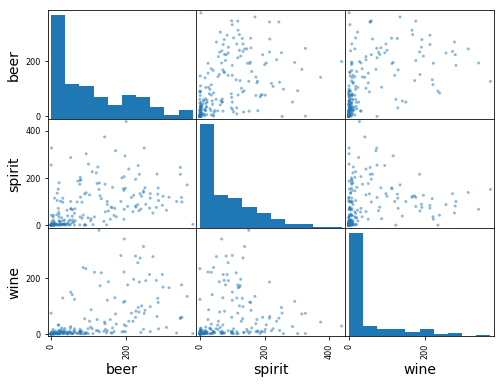

In [17]:
# scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D903CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E17F5C0>]], dtype=object)

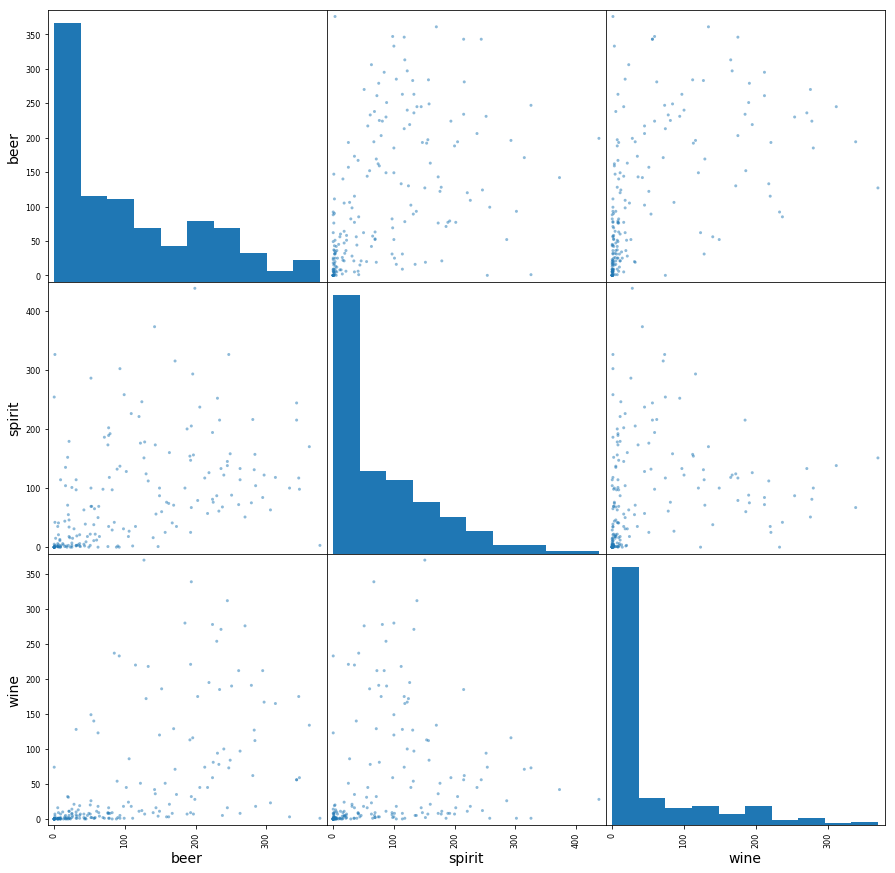

In [19]:
# increase figure size
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(15, 15))

## Bar Plot: show a numerical comparison across different categories

In [20]:
# count the number of countries in each continent
drinks.continent.value_counts() #value_counts() is the activator of the number of countries

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

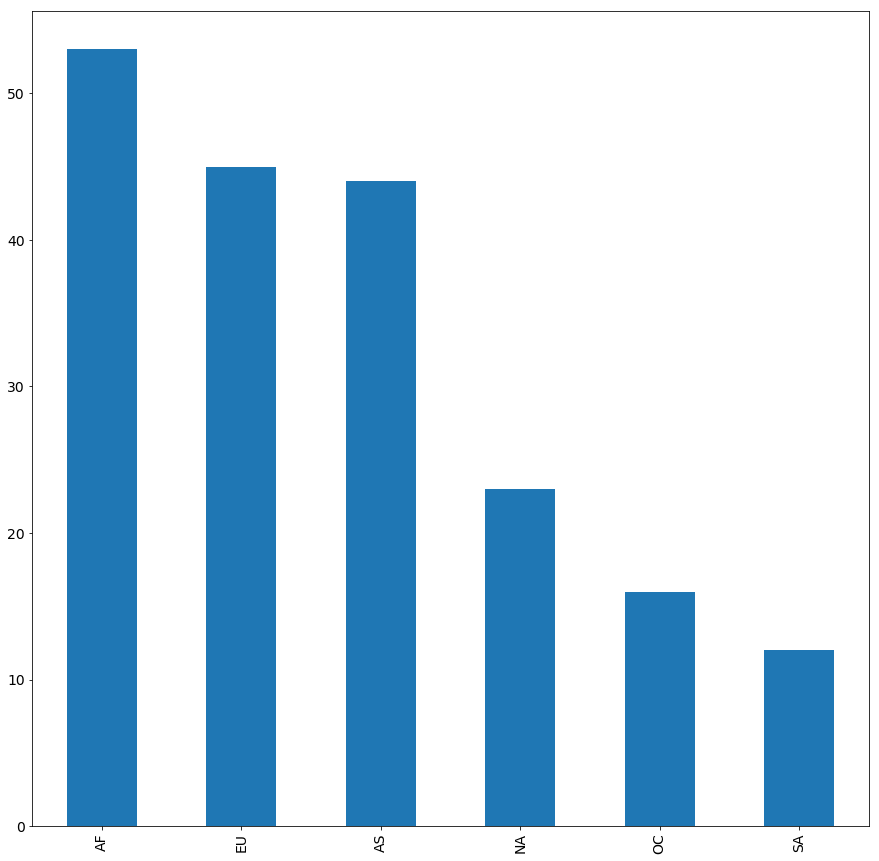

In [23]:
# compare with bar plot
drinks.continent.value_counts().plot(kind='bar', figsize=(15, 15))

In [24]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


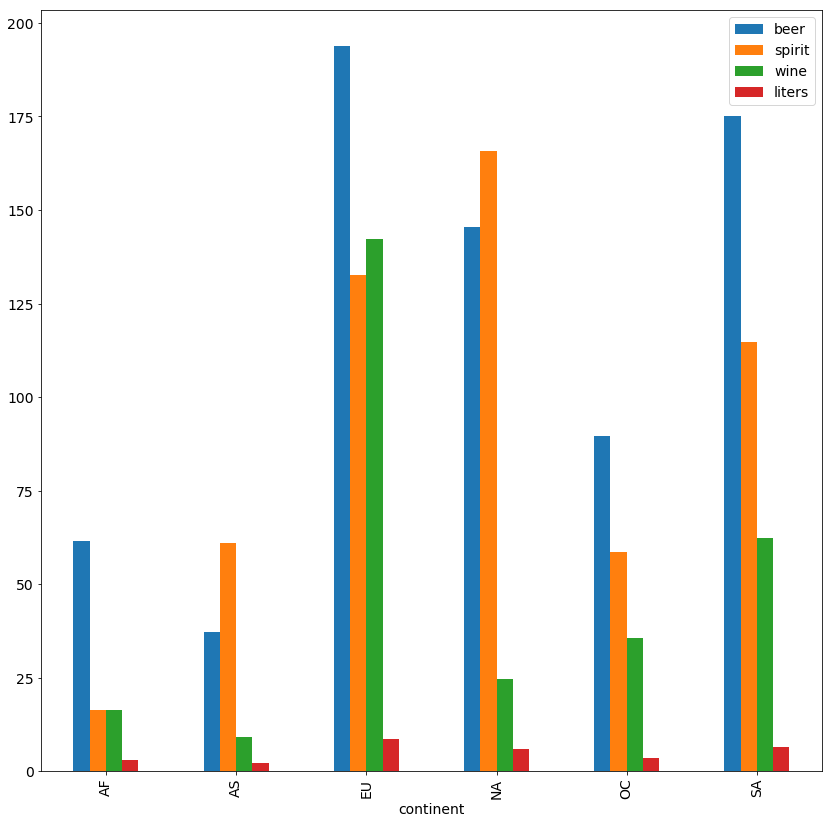

In [27]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar', figsize=(14,14))

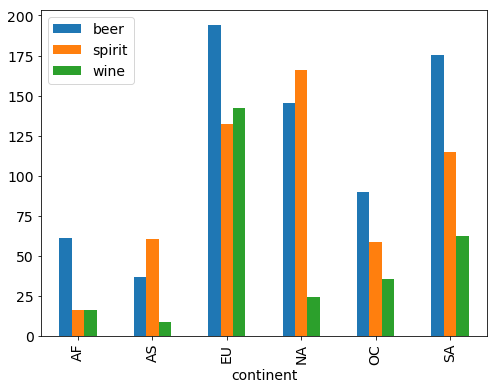

In [34]:
# drop the liters column
# print drinks.groupby('continent').mean().head()
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar')

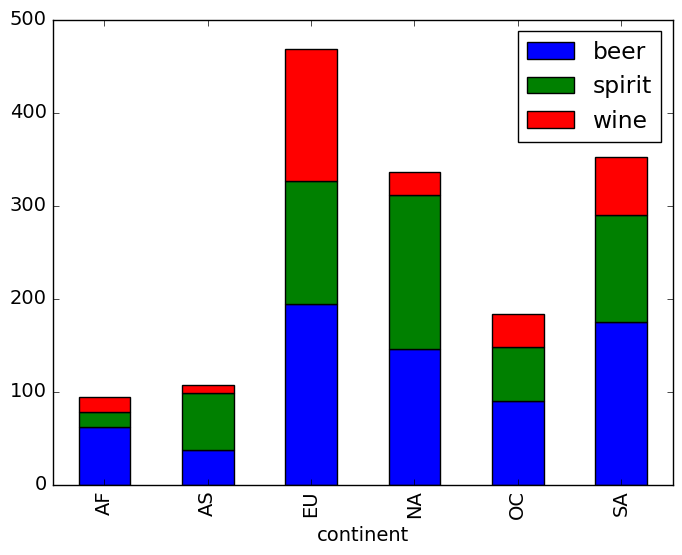

In [19]:
# stacked bar plots
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True)
#Key difference here is stacked=True

## Box Plot: show quartiles (and outliers) for one or more numerical variables

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

** Box Plot **
https://www.google.com.sg/imgres?imgurl=http://www.wellbeingatschool.org.nz/sites/default/files/W%40S_boxplot-labels.png&imgrefurl=http://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots&h=672&w=751&tbnid=Qd1HUdq0L8ny8M:&tbnh=160&tbnw=178&docid=ERnC5S4oRLm4bM&usg=__SvfiSu7gvgzIu6DLMHGhXm7pxzQ=&sa=X&ved=0ahUKEwi_s_GYluPPAhUJqY8KHT3cAywQ9QEIHjAA

In [35]:
# sort the spirit column
drinks.spirit.sort_values

<bound method Series.sort_values of 0        0
1      132
2        0
3      138
4       57
5      128
6       25
7      179
8       72
9       75
10      46
11     176
12      63
13       0
14     173
15     373
16      84
17     114
18       4
19       0
20      41
21     173
22      35
23     145
24       2
25     252
26       7
27       0
28       1
29      56
      ... 
163    178
164      2
165     60
166    100
167     35
168     15
169    258
170     27
171      1
172      2
173     21
174    156
175      3
176     22
177     71
178     41
179      9
180    237
181    135
182    126
183      6
184    158
185     35
186    101
187     18
188    100
189      2
190      0
191     19
192     18
Name: spirit, Length: 193, dtype: int64>

In [21]:
# show "five-number summary" for spirit
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

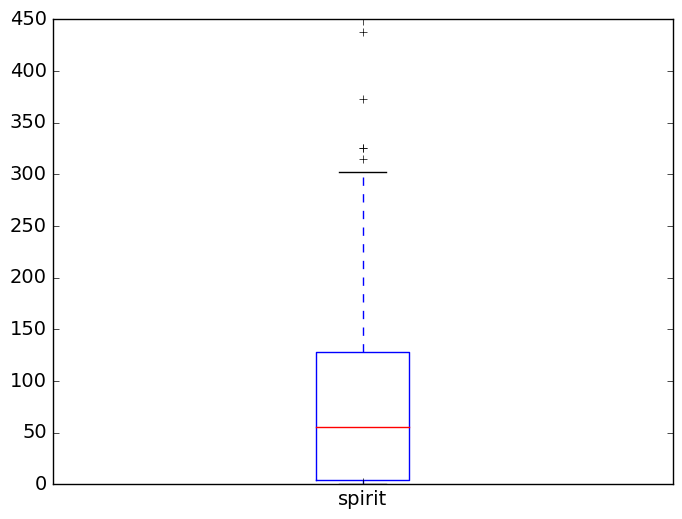

In [22]:
# compare with box plot
drinks.spirit.plot(kind='box')

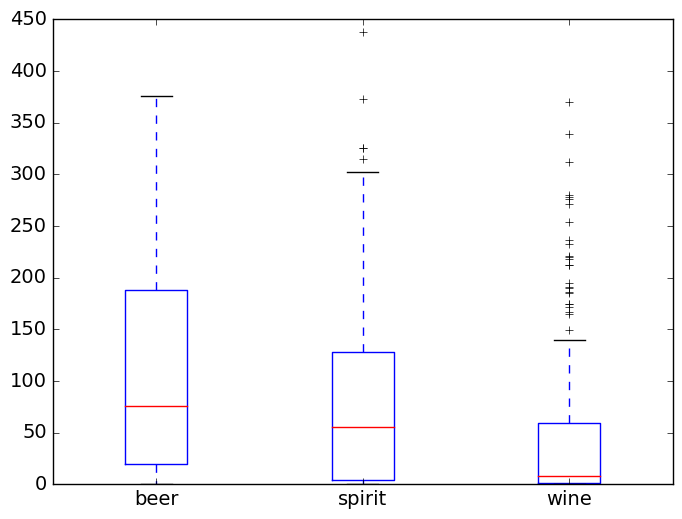

In [23]:
# include multiple variables
drinks.drop('liters', axis=1).plot(kind='box')
#plot everything EXCEPT liters

## Line Plot: show the trend of a numerical variable over time

In [40]:
# read in the ufo data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time) #convert the "Time" column to a date/time item
ufo['Year'] = ufo.Time.dt.year #parse the 'year' out
ufo.describe()

,Year
count,80543.000000
mean,2004.178737
std,10.602487
min,1930.000000
25%,2001.000000
50%,2007.000000
75%,2011.000000
max,2014.000000


In [85]:
# count the number of ufo reports each year (and sort by year)
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
2001    2925
2002    2933
2003    3507
2004    3850
2005    3787
2006    3445
2007    4058
2008    4655
2009    4251
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

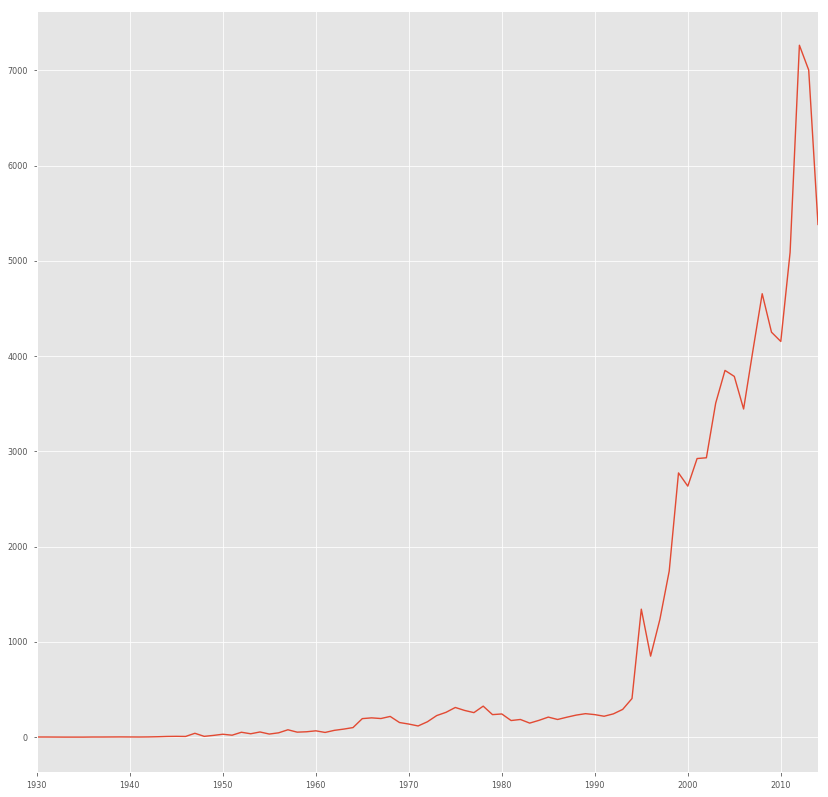

In [89]:
# compare with line plot
ufo.Year.value_counts().sort_index().plot(figsize=(14,14))

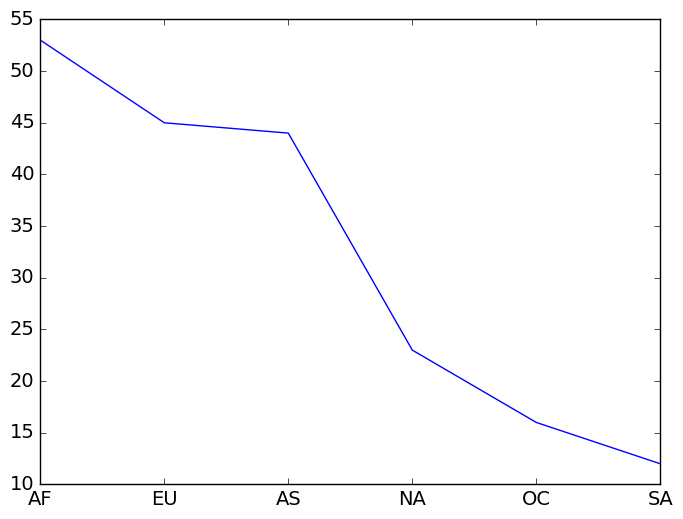

In [27]:
# don't use a line plot when there is no logical ordering
drinks.continent.value_counts().plot()

## Grouped Box Plots: show one box plot for each group

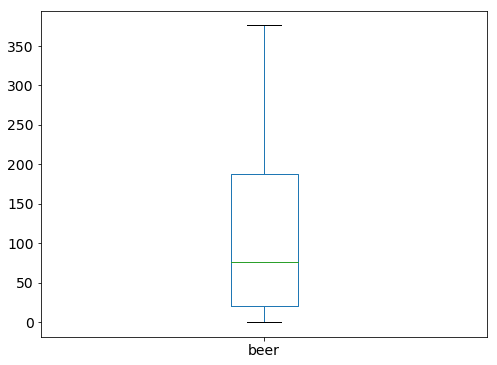

In [44]:
# reminder: box plot of beer servings
drinks.beer.plot(kind='box') #wow no outliers!

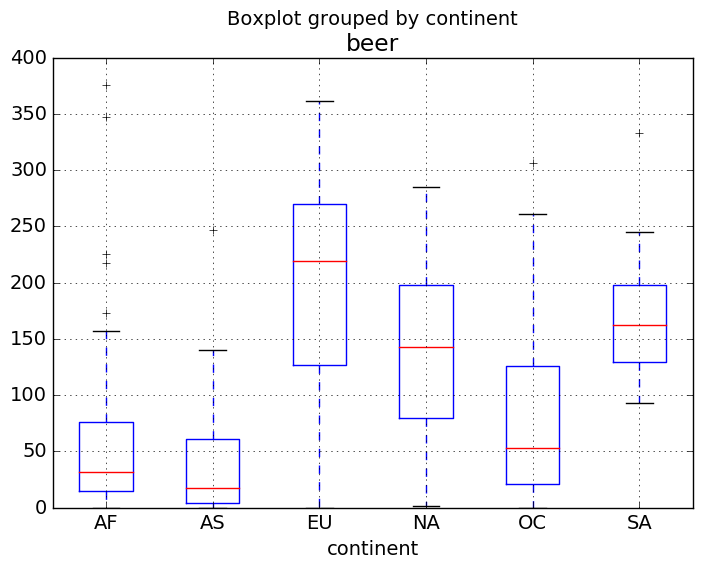

In [29]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011DA4A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001203B400>]], dtype=object)

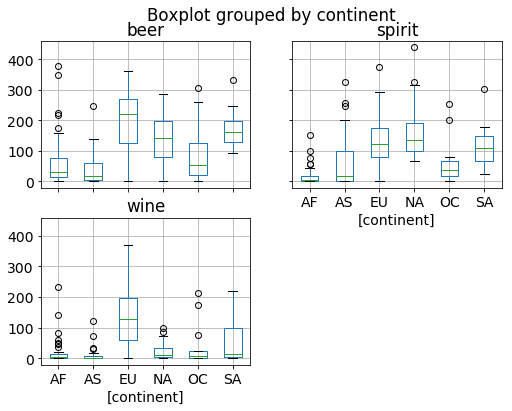

In [51]:
# box plot of all numeric columns grouped by continent
drinks.drop('liters', axis=1).boxplot(by='continent') # Oooh. If you want to drop a column, drop it right after the df.

## Grouped Histograms: show one histogram for each group

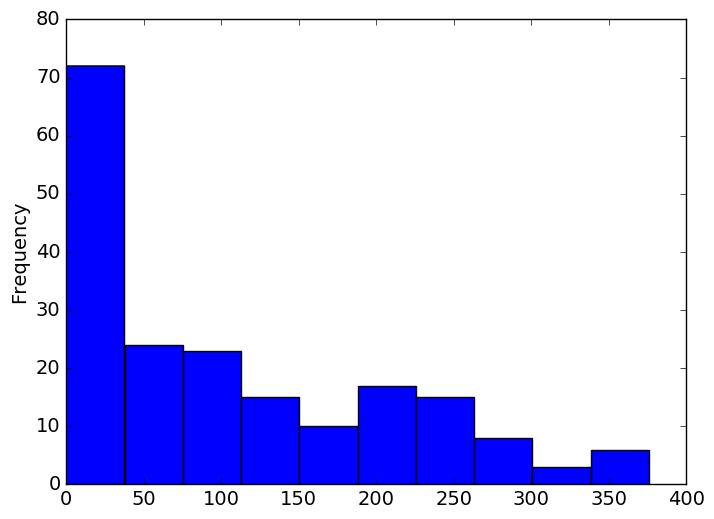

In [31]:
# reminder: histogram of beer servings
drinks.beer.plot(kind='hist')

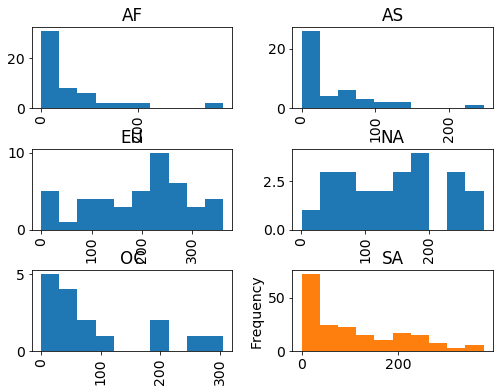

In [54]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent') #split into one histogram each continent
drinks.beer.plot(kind='hist', by='continent') # THIS DOESNT WORK!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000175675C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017D3E470>]], dtype=object)

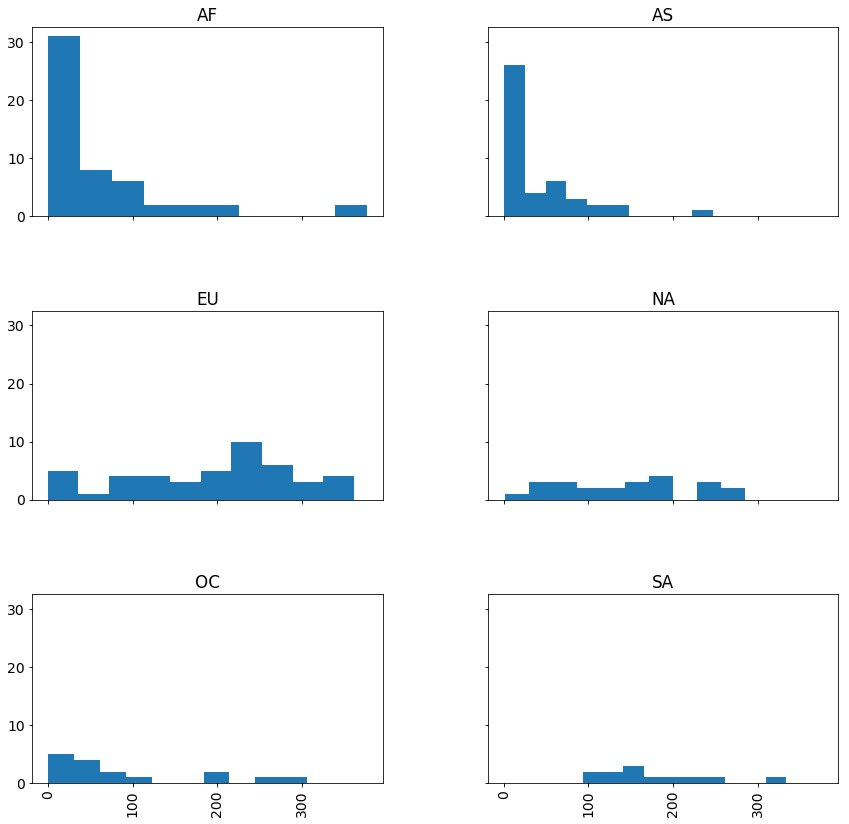

In [60]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True, figsize=(14,14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12212af90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122a3bf90>]], dtype=object)

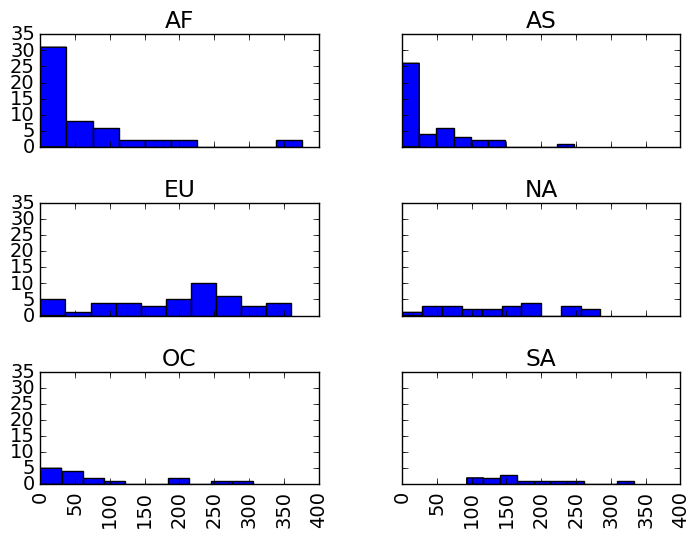

In [34]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123147c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12356cd10>]], dtype=object)

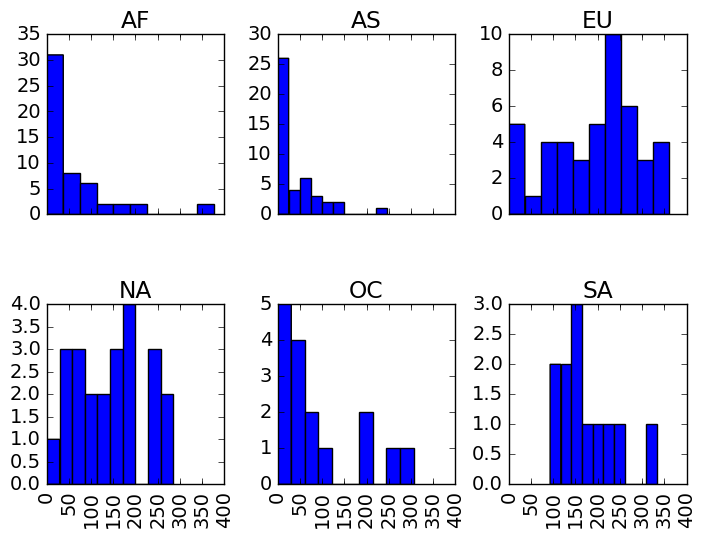

In [35]:
# change the layout
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3))

## Assorted Functionality

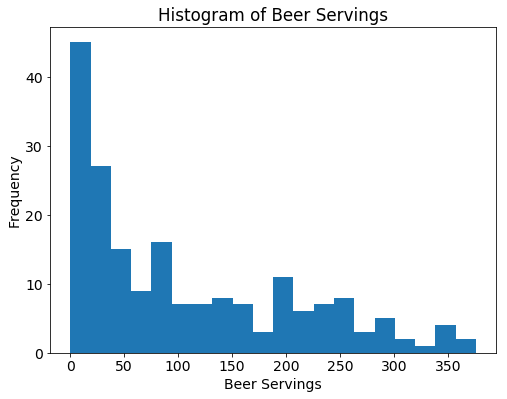

In [61]:
# saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram.png')

In [37]:
# list available plot styles
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

ValueError: num must be 1 <= num <= 0, not 1

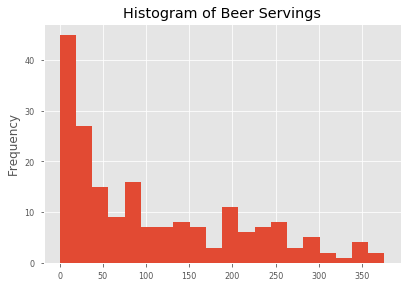

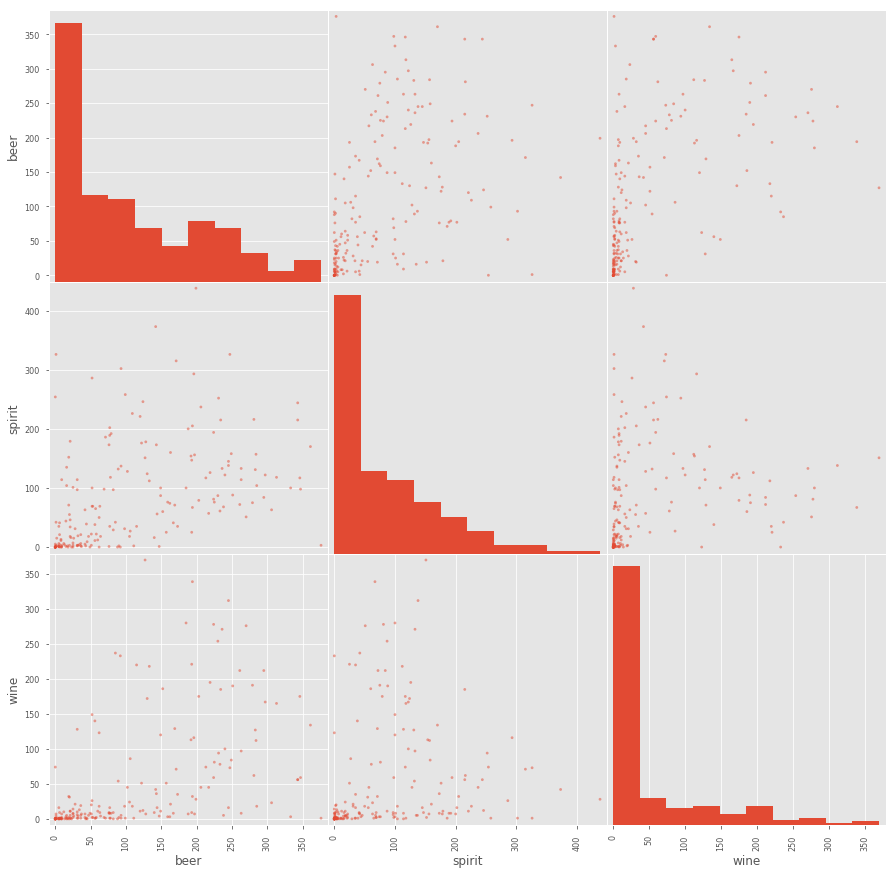

In [98]:
# change to a different style
plt.style.use('ggplot')
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(15, 15))

ufo = ufo.rename(index=str, columns={"Colors Reported": "Color", "Shape Reported": "Shape"})

pd.plotting.scatter_matrix(ufo[['City', 'Shape', 'Color']], figsize=(15, 15)) #What's wrong with this? Why can't I get the scatter matrix? 
# Is it because there are too many unique values?
ufo.City.plot(kind='hist')
# This can't work too!
ufo.Year.value_counts().sort_index().plot(figsize=(14,14))

In [39]:
# TODO

# - find csv data of interest to your project
# - explore it using pandas with some visualisation

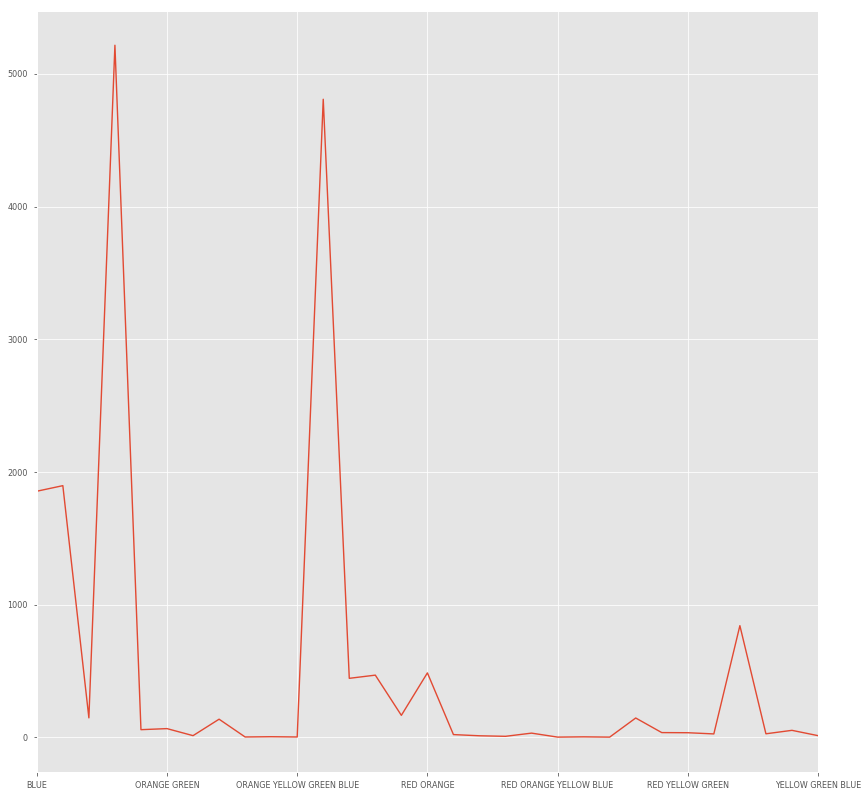

In [102]:
ufo.Color.value_counts().sort_index().plot(figsize=(14,14))